In [1]:
import pandas as pd

from loadData import loadData
from extract_fiducials import extract_fiducials
from extract_features import extract_features
from preprocess import preprocess
from artifacts import artifacts
import os

from sklearn.preprocessing import MinMaxScaler

import numpy as np

# Load Data

In [2]:
ROOT_PATH = 'C:/Users/cricr/PycharmProjects/AI-project/train'

In [3]:
ppgs_128, speaks_128, annotations_128, ppgs_250, speaks_250, annotations_250 = loadData(ROOT_PATH)

Loading file: 1/62
Loading file: 2/62
Loading file: 3/62
Loading file: 4/62
Loading file: 5/62
Loading file: 6/62
Loading file: 7/62
Loading file: 8/62
Loading file: 9/62
Loading file: 10/62
Loading file: 11/62
Loading file: 12/62
Loading file: 13/62
Loading file: 14/62
Loading file: 15/62
Loading file: 16/62
Loading file: 17/62
Loading file: 18/62
Loading file: 19/62
Loading file: 20/62
Loading file: 21/62
Loading file: 22/62
Loading file: 23/62
Loading file: 24/62
Loading file: 25/62
Loading file: 26/62
Loading file: 27/62
Loading file: 28/62
Loading file: 29/62
Loading file: 30/62
Loading file: 31/62
Loading file: 32/62
Loading file: 33/62
Loading file: 34/62
Loading file: 35/62
Loading file: 36/62
Loading file: 37/62
Loading file: 38/62
Loading file: 39/62
Loading file: 40/62
Loading file: 41/62
Loading file: 42/62
Loading file: 43/62
Loading file: 44/62
Loading file: 45/62
Loading file: 46/62
Loading file: 47/62
Loading file: 48/62
Loading file: 49/62
Loading file: 50/62
Loading f

# Pre-processing

In [4]:
for i in range(len(ppgs_128)):
    ppgs_128[i] = preprocess(ppgs_128[i],128)

In [5]:
for i in range(len(ppgs_250)):
    ppgs_250[i] = preprocess(ppgs_250[i],250)

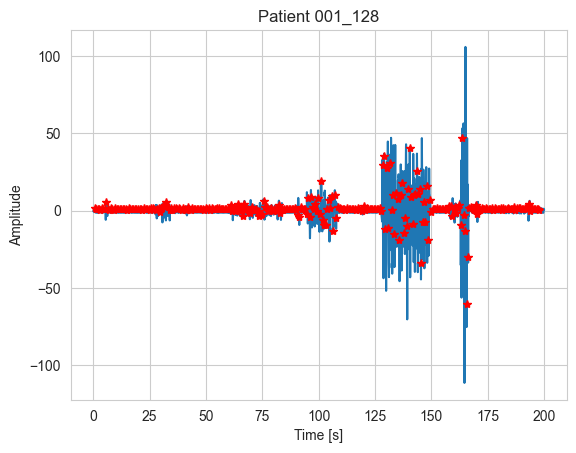

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
axs.set_title("Patient 001_128")
fs=128
t = np.arange(0, ppgs_128[0].shape[0]/fs, 1/fs)
axs.plot(t[0:200*128], ppgs_128[0][0:200*128], color='C0')
axs.plot((speaks_128[0][0:300])/128, ppgs_128[0][speaks_128[0][0:300]],'*', color='r')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

## Artifacts removal

In [7]:
n_speaks_128=list()
n_annotations_128=list()

for i in range(len(speaks_128)):
    speaks, annotations = artifacts(speaks_128[i],ppgs_128[i],annotations_128[i])
    n_speaks_128.append(speaks)
    n_annotations_128.append(annotations)


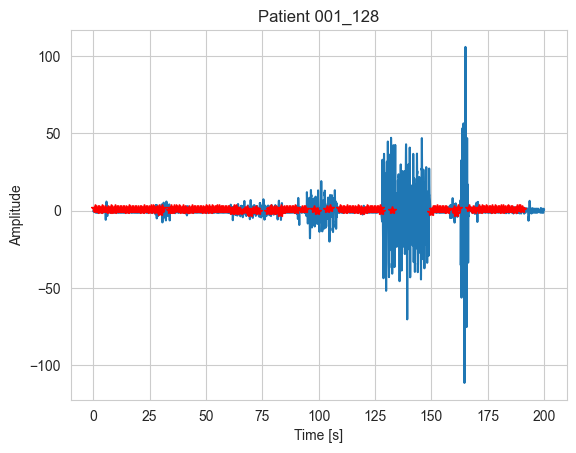

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
axs.set_title("Patient 001_128")
fs=128
t = np.arange(0, ppgs_128[0].shape[0]/fs, 1/fs)
axs.plot(t[0:200*128], ppgs_128[0][0:200*128], color='C0')
axs.plot((n_speaks_128[0][0:200])/128, ppgs_128[0][n_speaks_128[0][0:200]],'*', color='r')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()



In [9]:
n_speaks_250=list()
n_annotations_250=list()

for i in range(len(speaks_250)):
    speaks, annotations = artifacts(speaks_250[i],ppgs_250[i],annotations_250[i])
    n_speaks_250.append(speaks)
    n_annotations_250.append(annotations)
    

# Extract fiducials

In [10]:
'''
folder_path = u'C:/Users/cricr/PycharmProjects/AI-project/fiducials/128' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_128.csv')]

fiducials_128 = []

# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    fiducial = pd.read_csv(file_path)
    fiducials_128.append(fiducial)
    '''

"\nfolder_path = u'C:/Users/cricr/PycharmProjects/AI-project/fiducials/128' \n\n# List all files in the folder\nfile_names = [file for file in os.listdir(folder_path) if file.endswith('_128.csv')]\n\nfiducials_128 = []\n\n# Loop through each file and concatenate the data\nfor file_name in file_names:\n    file_path = os.path.join(folder_path, file_name)\n    fiducial = pd.read_csv(file_path)\n    fiducials_128.append(fiducial)\n    "

In [11]:
'''
(folder_path = u'C:/Users/cricr/PycharmProjects/AI-project/fiducials/250' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_250.csv')]

fiducials_250 = []

# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    fiducial = pd.read_csv(file_path)
    fiducials_250.append(fiducial)

'''

"\n(folder_path = u'C:/Users/cricr/PycharmProjects/AI-project/fiducials/250' \n\n# List all files in the folder\nfile_names = [file for file in os.listdir(folder_path) if file.endswith('_250.csv')]\n\nfiducials_250 = []\n\n# Loop through each file and concatenate the data\nfor file_name in file_names:\n    file_path = os.path.join(folder_path, file_name)\n    fiducial = pd.read_csv(file_path)\n    fiducials_250.append(fiducial)\n\n"

In [12]:
fiducials_128 = list()

for i in range(len(ppgs_128)):
   fiducials_128.append(extract_fiducials(ppgs_128[i], n_speaks_128[i],128))

In [13]:

fiducials_250 = list()

for i in range(len(ppgs_250)):
   fiducials_250.append(extract_fiducials(ppgs_250[i], n_speaks_250[i],250))


# Write fiducials to CSV
Because the process of extracting fiducials is time consuming, we write them on files

In [14]:

i = 0
for fiducial in fiducials_128:
    file_name = f"C:/Users/cricr/PycharmProjects/AI-project/fiducials/128/fiducial_{i}_128.csv"
    fiducial.to_csv(file_name, sep=',', index=False, encoding='utf-8')
    i = i + 1


In [15]:

i = 0
for fiducial in fiducials_250:
    file_name = f"C:/Users/cricr/PycharmProjects/AI-project/fiducials/250/fiducial_{i}_250.csv"
    fiducial.to_csv(file_name, sep=',', index=False, encoding='utf-8')
    i = i + 1


# Extract features

In [16]:

features_128 = list()

for i in range(len(fiducials_128)):
    features_128.append(extract_features(fiducials_128[i], ppgs_128[i], 128))


C:\Users\cricr\PycharmProjects\AI-project\extract_features.py:105: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\cricr\PycharmProjects\AI-project\extract_features.py:105: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\cricr\PycharmProjects\AI-project\extract_features.py:105: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\cricr\PycharmProjects\AI-project\extract_features.py:105: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\cricr\PycharmProjects\AI-project\extract_features.py:105: Runti

In [17]:

features_250 = list()

for i in range(len(fiducials_250)):
    features_250.append(extract_features(fiducials_250[i], ppgs_250[i], 250))


C:\Users\cricr\PycharmProjects\AI-project\extract_features.py:105: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\cricr\PycharmProjects\AI-project\extract_features.py:105: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\cricr\PycharmProjects\AI-project\extract_features.py:105: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\cricr\PycharmProjects\AI-project\extract_features.py:105: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\cricr\PycharmProjects\AI-project\extract_features.py:105: Runti

# Add annotation to peaks

In [18]:
for i in range(len(features_128)):
    features_128[i]['annotation'] = n_annotations_128[i]
for i in range(len(features_250)):
    features_250[i]['annotation'] = n_annotations_250[i]

# Remove rows with null values

In [19]:
for i in range(len(features_128)):
    # Find rows with at least one NaN value using np.isnan()
    rows_with_nan = features_128[i][features_128[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]

    # Remove rows with NaN values
    features_128[i] = features_128[i].drop(rows_with_nan.index)

C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\510882841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_128[i][features_128[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\510882841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_128[i][features_128[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\510882841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_128[i][features_128[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\510882841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use

In [20]:
for i in range(len(features_250)):
    # Find rows with at least one NaN value using np.isnan()
    rows_with_nan = features_250[i][features_250[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]

    # Remove rows with NaN values
    features_250[i] = features_250[i].drop(rows_with_nan.index)

C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\3240610789.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_250[i][features_250[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\3240610789.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_250[i][features_250[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\3240610789.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_250[i][features_250[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\3240610789.py:3: FutureWarning: DataFrame.applymap has been deprecated.

# Remove rows with TP = 0 --> ST = inf

In [21]:
for i in range(len(features_128)):
    features_128[i] = features_128[i][features_128[i]['TP'] != 0]

In [22]:
for i in range(len(features_250)):
    features_250[i] = features_250[i][features_250[i]['TP'] != 0]

# Normalization

In [23]:
import pandas as pd
for i in range(len(features_128)):
    
   normalized_df = features_128[i].iloc[:, :-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
   features_128[i] = pd.concat([normalized_df, features_128[i].iloc[:, -1]], axis=1)

In [24]:
for i in range(len(features_250)):
   normalized_df = features_250[i].iloc[:, :-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
   features_250[i] = pd.concat([normalized_df, features_250[i].iloc[:, -1]], axis=1)

# Delete eventual NaN caused by Normalization

In [25]:
for i in range(len(features_128)):
    # Find rows with at least one NaN value using np.isnan()
    rows_with_nan = features_128[i][features_128[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]

    # Remove rows with NaN values
    features_128[i] = features_128[i].drop(rows_with_nan.index)

C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\510882841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_128[i][features_128[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\510882841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_128[i][features_128[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\510882841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_128[i][features_128[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\510882841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use

In [26]:
for i in range(len(features_250)):
    # Find rows with at least one NaN value using np.isnan()
    rows_with_nan = features_250[i][features_250[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]

    # Remove rows with NaN values
    features_250[i] = features_250[i].drop(rows_with_nan.index)

C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\3240610789.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_250[i][features_250[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\3240610789.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_250[i][features_250[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\3240610789.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_250[i][features_250[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\cricr\AppData\Local\Temp\ipykernel_10312\3240610789.py:3: FutureWarning: DataFrame.applymap has been deprecated.

In [27]:

for i in range(len(features_128)):
    features_128[i] = features_128[i][features_128[i]['TP'] != 0]
for i in range(len(features_250)):
    features_250[i] = features_250[i][features_250[i]['TP'] != 0]

# Write features to csv

In [28]:
i = 0
for feature in features_128:
    file_name = f"C:/Users/cricr/PycharmProjects/AI-project/features/128/features_{i}_128.csv"
    feature.to_csv(file_name, sep=',', index=False, encoding='utf-8')
    i = i + 1

In [29]:
i = 0
for feature in features_250:
    file_name = f"C:/Users/cricr/PycharmProjects/AI-project/features/250/features_{i}_250.csv"
    feature.to_csv(file_name, sep=',', index=False, encoding='utf-8')
    i = i + 1